In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
import random
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Overview of the data
**Total records:** 5777\
**Total features including Target:** 31

In [79]:
# read the data
df = pd.read_csv('./data/data.csv', sep=";")
df.shape

(5777, 31)

In [80]:
pd.value_counts(df.dtypes)

float64    15
int64      13
object      3
dtype: int64


Some features have **low STD**, e.g., ***AmbTempDist_K3***, ***AmbTempDist_K4***. We will look into the variance of variables for further investigation. ***PSEUDO_VIN*** has 5777 unique values, so it might not be a useful feature for modeling. 

In [81]:
df.describe()

PSEUDO_VIN        TONDUR  EngSpDist_K1  EngSpDist_K2  EngSpDist_K3  \
count  5777.000000  5.777000e+03  5.777000e+03  5.777000e+03  5.777000e+03   
mean   2889.000000  1.638604e+06  6.949810e+05  5.659570e+05  1.523329e+05   
std    1667.820584  1.478634e+06  7.280069e+05  5.510523e+05  1.698033e+05   
min       1.000000  1.692310e+04  4.641300e+03  4.066000e+02  3.030000e+01   
25%    1445.000000  6.443811e+05  2.352837e+05  1.947698e+05  4.601980e+04   
50%    2889.000000  1.167932e+06  4.634370e+05  3.886051e+05  9.958480e+04   
75%    4333.000000  2.111713e+06  8.623770e+05  7.292884e+05  1.953351e+05   
max    5777.000000  1.151146e+07  6.959281e+06  4.262310e+06  2.453757e+06   

        EngSpDist_K4   EngSpDist_K5  EngSpDist_K6  EngSpDist_K7  EngSpDist_K8  \
count    5777.000000    5777.000000   5777.000000   5777.000000   5777.000000   
mean    17916.948520    2744.953176    769.363095    343.032404    181.538982   
std     31982.030334    6069.909116   1871.395346    803.763476    481.114263   
min        10.400000       3.400000      0.900000      0.200000      0.000000   
25%      3302.400000     609.400000     88.600000     33.900000     15.400000   
50%      8232.300000    1166.800000    261.900000    103.900000     47.700000   
75%     19650.900000    2629.400000    753.300000    319.200000    153.100000   
max    646982.900000  152502.200000  74583.600000  25328.500000  16623.100000   

       ...  AmbTempDist_K3  AmbTempDist_K4  AmbTempDist_K5  AmbTempDist_K6  \
count  ...     5777.000000     5777.000000     5777.000000     5777.000000   
mean   ...        0.041544        1.030812       11.718885      107.391726   
std    ...        0.766331        8.675519       43.497786      182.867761   
min    ...        0.000000        0.000000        0.000000        0.000000   
25%    ...        0.000000        0.000000        0.000000       10.000000   
50%    ...        0.000000        0.000000        0.000000       36.000000   
75%    ...        0.000000        0.000000        4.000000      128.000000   
max    ...       41.000000      395.000000     1016.000000     2592.000000   

       AmbTempDist_K7  AmbTempDist_K8  AmbTempDist_K9  AmbTempDist_K10  \
count     5777.000000     5777.000000     5777.000000      5777.000000   
mean       331.057989      507.202527      194.065605        12.809070   
std        330.765296      447.363231      282.863019        40.439852   
min          0.000000        0.000000        0.000000         0.000000   
25%        113.000000      206.000000       19.000000         0.000000   
50%        226.000000      376.000000       87.000000         0.000000   
75%        433.000000      652.000000      250.000000         4.000000   
max       3874.000000     5947.000000     2579.000000       685.000000   

             MILEAGE  TACHOMETER_IN_KM  
count    5777.000000        336.000000  
mean    13322.323524      30366.226190  
std     13254.917856      17811.425833  
min      1002.000000       1873.000000  
25%      4485.000000      17586.250000  
50%      9330.000000      26821.000000  
75%     17187.000000      40978.000000  
max    157940.000000     115314.000000  

[8 rows x 28 columns]

There are three non-numeric features in the variable including target variable.

In [82]:
df.select_dtypes(exclude="number").head()

DIAGNOSIS_DATE REPAIR_DATE      LABEL
0       03.06.14         NaN  NO_DAMAGE
1       10.08.15         NaN  NO_DAMAGE
2       30.01.15         NaN  NO_DAMAGE
3       02.04.15         NaN  NO_DAMAGE
4       23.11.15         NaN  NO_DAMAGE

***REPAIR_DATE*** and ***TACHOMETER_IN_KM*** has too many missing values.

In [83]:
df.isna().sum()

PSEUDO_VIN             0
TONDUR                 0
EngSpDist_K1           0
EngSpDist_K2           0
EngSpDist_K3           0
EngSpDist_K4           0
EngSpDist_K5           0
EngSpDist_K6           0
EngSpDist_K7           0
EngSpDist_K8           0
EngSpDist_K9           0
EngSpDist_K10          0
EngSpDist_K11          0
EngSpDist_K12          0
EngSpDist_K13          0
EngSpDist_K14          0
AmbTempDist_K1         0
AmbTempDist_K2         0
AmbTempDist_K3         0
AmbTempDist_K4         0
AmbTempDist_K5         0
AmbTempDist_K6         0
AmbTempDist_K7         0
AmbTempDist_K8         0
AmbTempDist_K9         0
AmbTempDist_K10        0
MILEAGE                0
DIAGNOSIS_DATE         0
REPAIR_DATE         5441
TACHOMETER_IN_KM    5441
LABEL                  0
dtype: int64

### Data Sparsity

Let's plot missing values through missigno. It looks most of the data is complete with the exception of two features ***REPAIRE_DATE*** and ***TACHOMETER_IN_KM***.

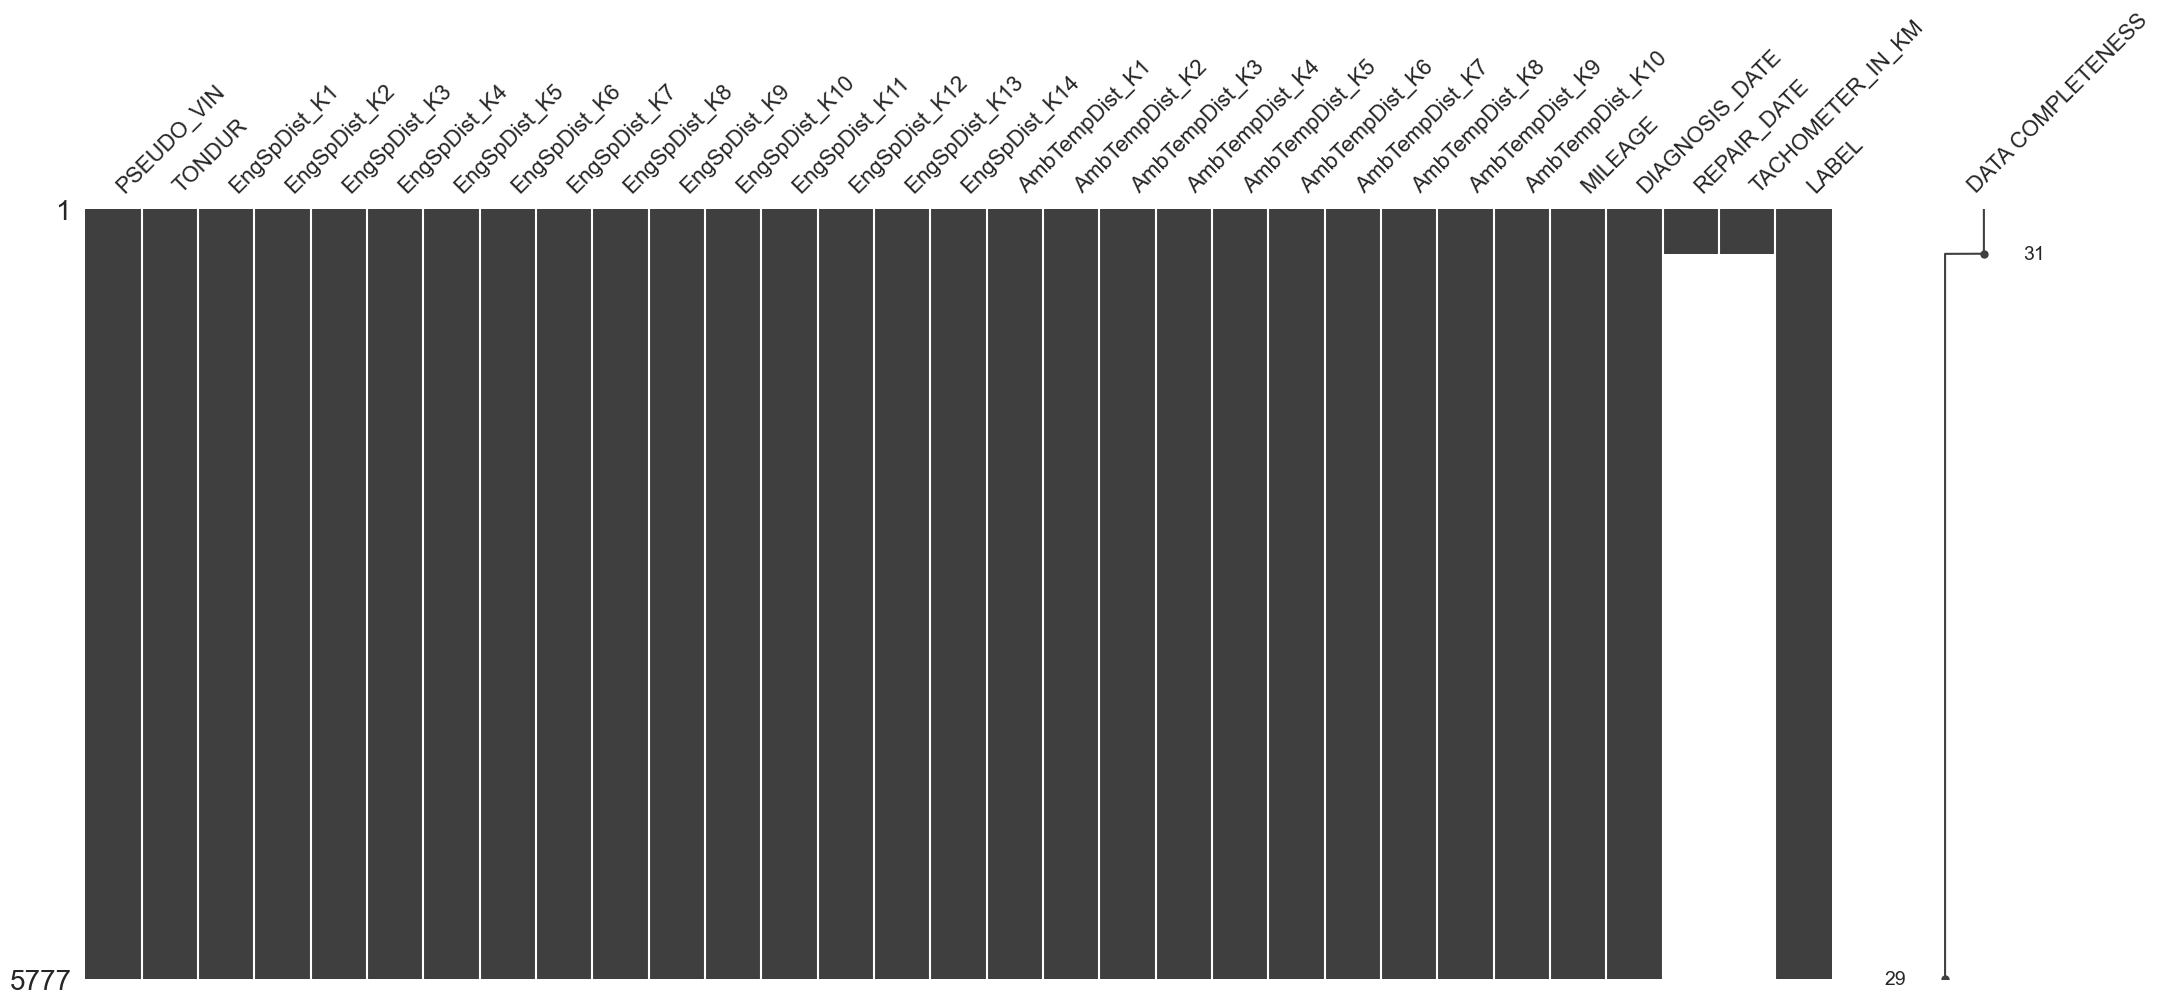

In [84]:
msno.matrix(df, labels=True, sort="descending");

Let's quantify the missing data information in terms of percentage for each feature. Surely, more than 80% of the data is missing for two features.

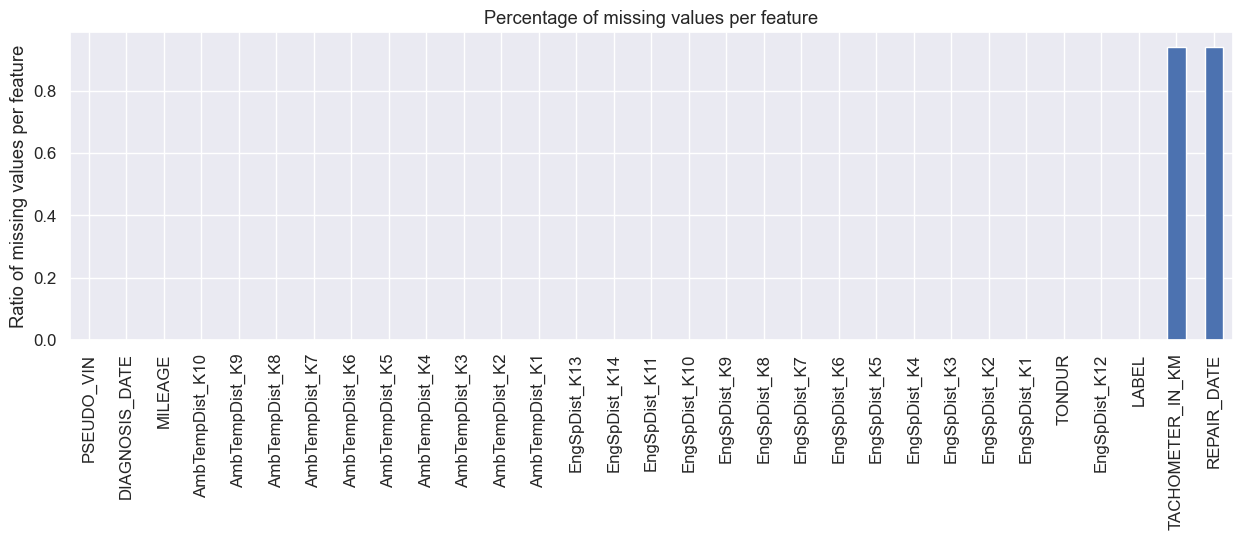

In [85]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

Given the problem we can drop these two variables for two reason: **i)** it contains too much missing data so it doesn't bring information into the modeling. Even though we can apply replacement methodologies but with this amount of missing data, I'd rather remove those features as replacement methods, e.g., averages, etc, would still result in low variance. **ii)** According to my understanding of these two features ***REPAIR_DATE*** is the day when vehicle was repaired, this feature would highly useful if we had actual values for this as we can calculate the number of days through ***DIAGNOSE_DATE*** and ***REPAIR_DATE*** features which might result in high correlation to the target variable. Same goes for the feature ***TACHOMETER_IN_KM***, this features might have high correlation if it would have been recorded. Moreover, with this amount of data missing, I would missing, these were not considered relevant, consequently, not recorded at all.

In [88]:
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(5777, 31)

In [89]:
df.keys()

Index(['PSEUDO_VIN', 'TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3',
       'EngSpDist_K4', 'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7',
       'EngSpDist_K8', 'EngSpDist_K9', 'EngSpDist_K10', 'EngSpDist_K11',
       'EngSpDist_K12', 'EngSpDist_K13', 'EngSpDist_K14', 'AmbTempDist_K1',
       'AmbTempDist_K2', 'AmbTempDist_K3', 'AmbTempDist_K4', 'AmbTempDist_K5',
       'AmbTempDist_K6', 'AmbTempDist_K7', 'AmbTempDist_K8', 'AmbTempDist_K9',
       'AmbTempDist_K10', 'MILEAGE', 'DIAGNOSIS_DATE', 'REPAIR_DATE',
       'TACHOMETER_IN_KM', 'LABEL'],
      dtype='object')

<AxesSubplot: title={'center': 'Unique values per feature'}>

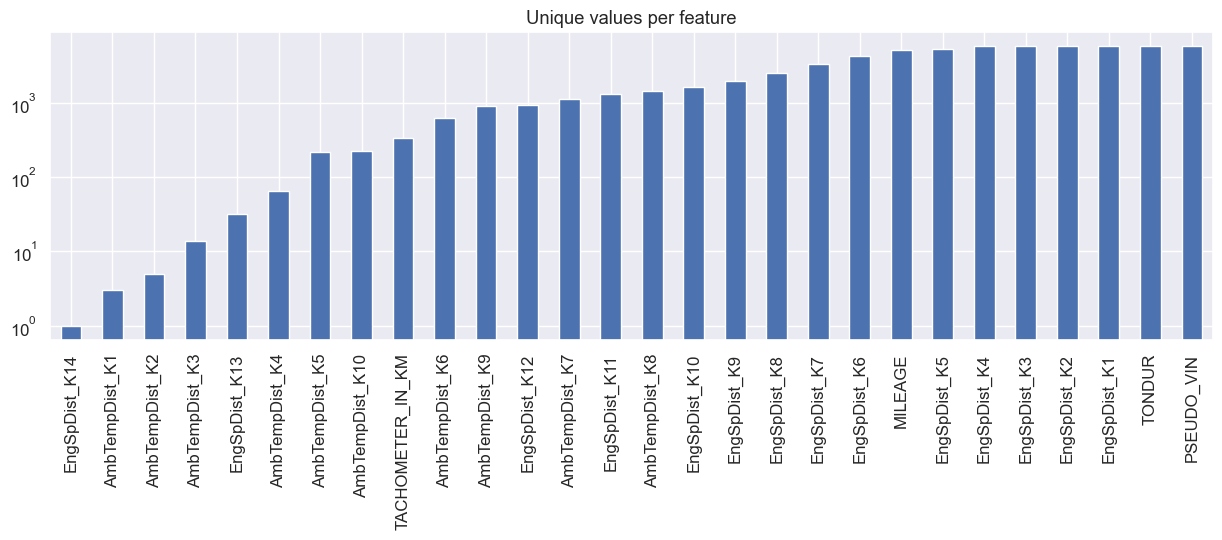

In [8]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

<AxesSubplot: title={'center': 'Variance per feature'}>

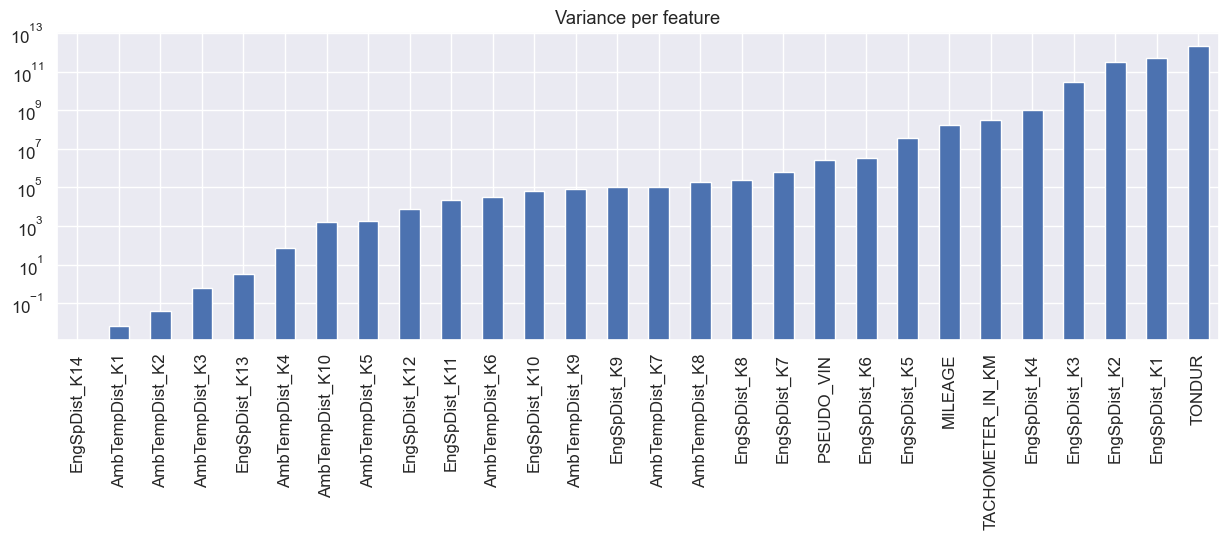

In [9]:
df.var().sort_values().plot.bar(logy=True, figsize=(15, 4), title="Variance per feature")

In [10]:
df = df.drop(columns=['EngSpDist_K14', 'AmbTempDist_K1', 'AmbTempDist_K2', 'AmbTempDist_K3', 'EngSpDist_K13', 'AmbTempDist_K4'])

In [11]:
n_duplicates = df.duplicated().sum()
print(f"Duplicate recordrs: {n_duplicates}")

Duplicate recordrs: 0


(5777, 23)

In [15]:
df = df.drop(columns=['DIAGNOSIS_DATE'], axis=1)

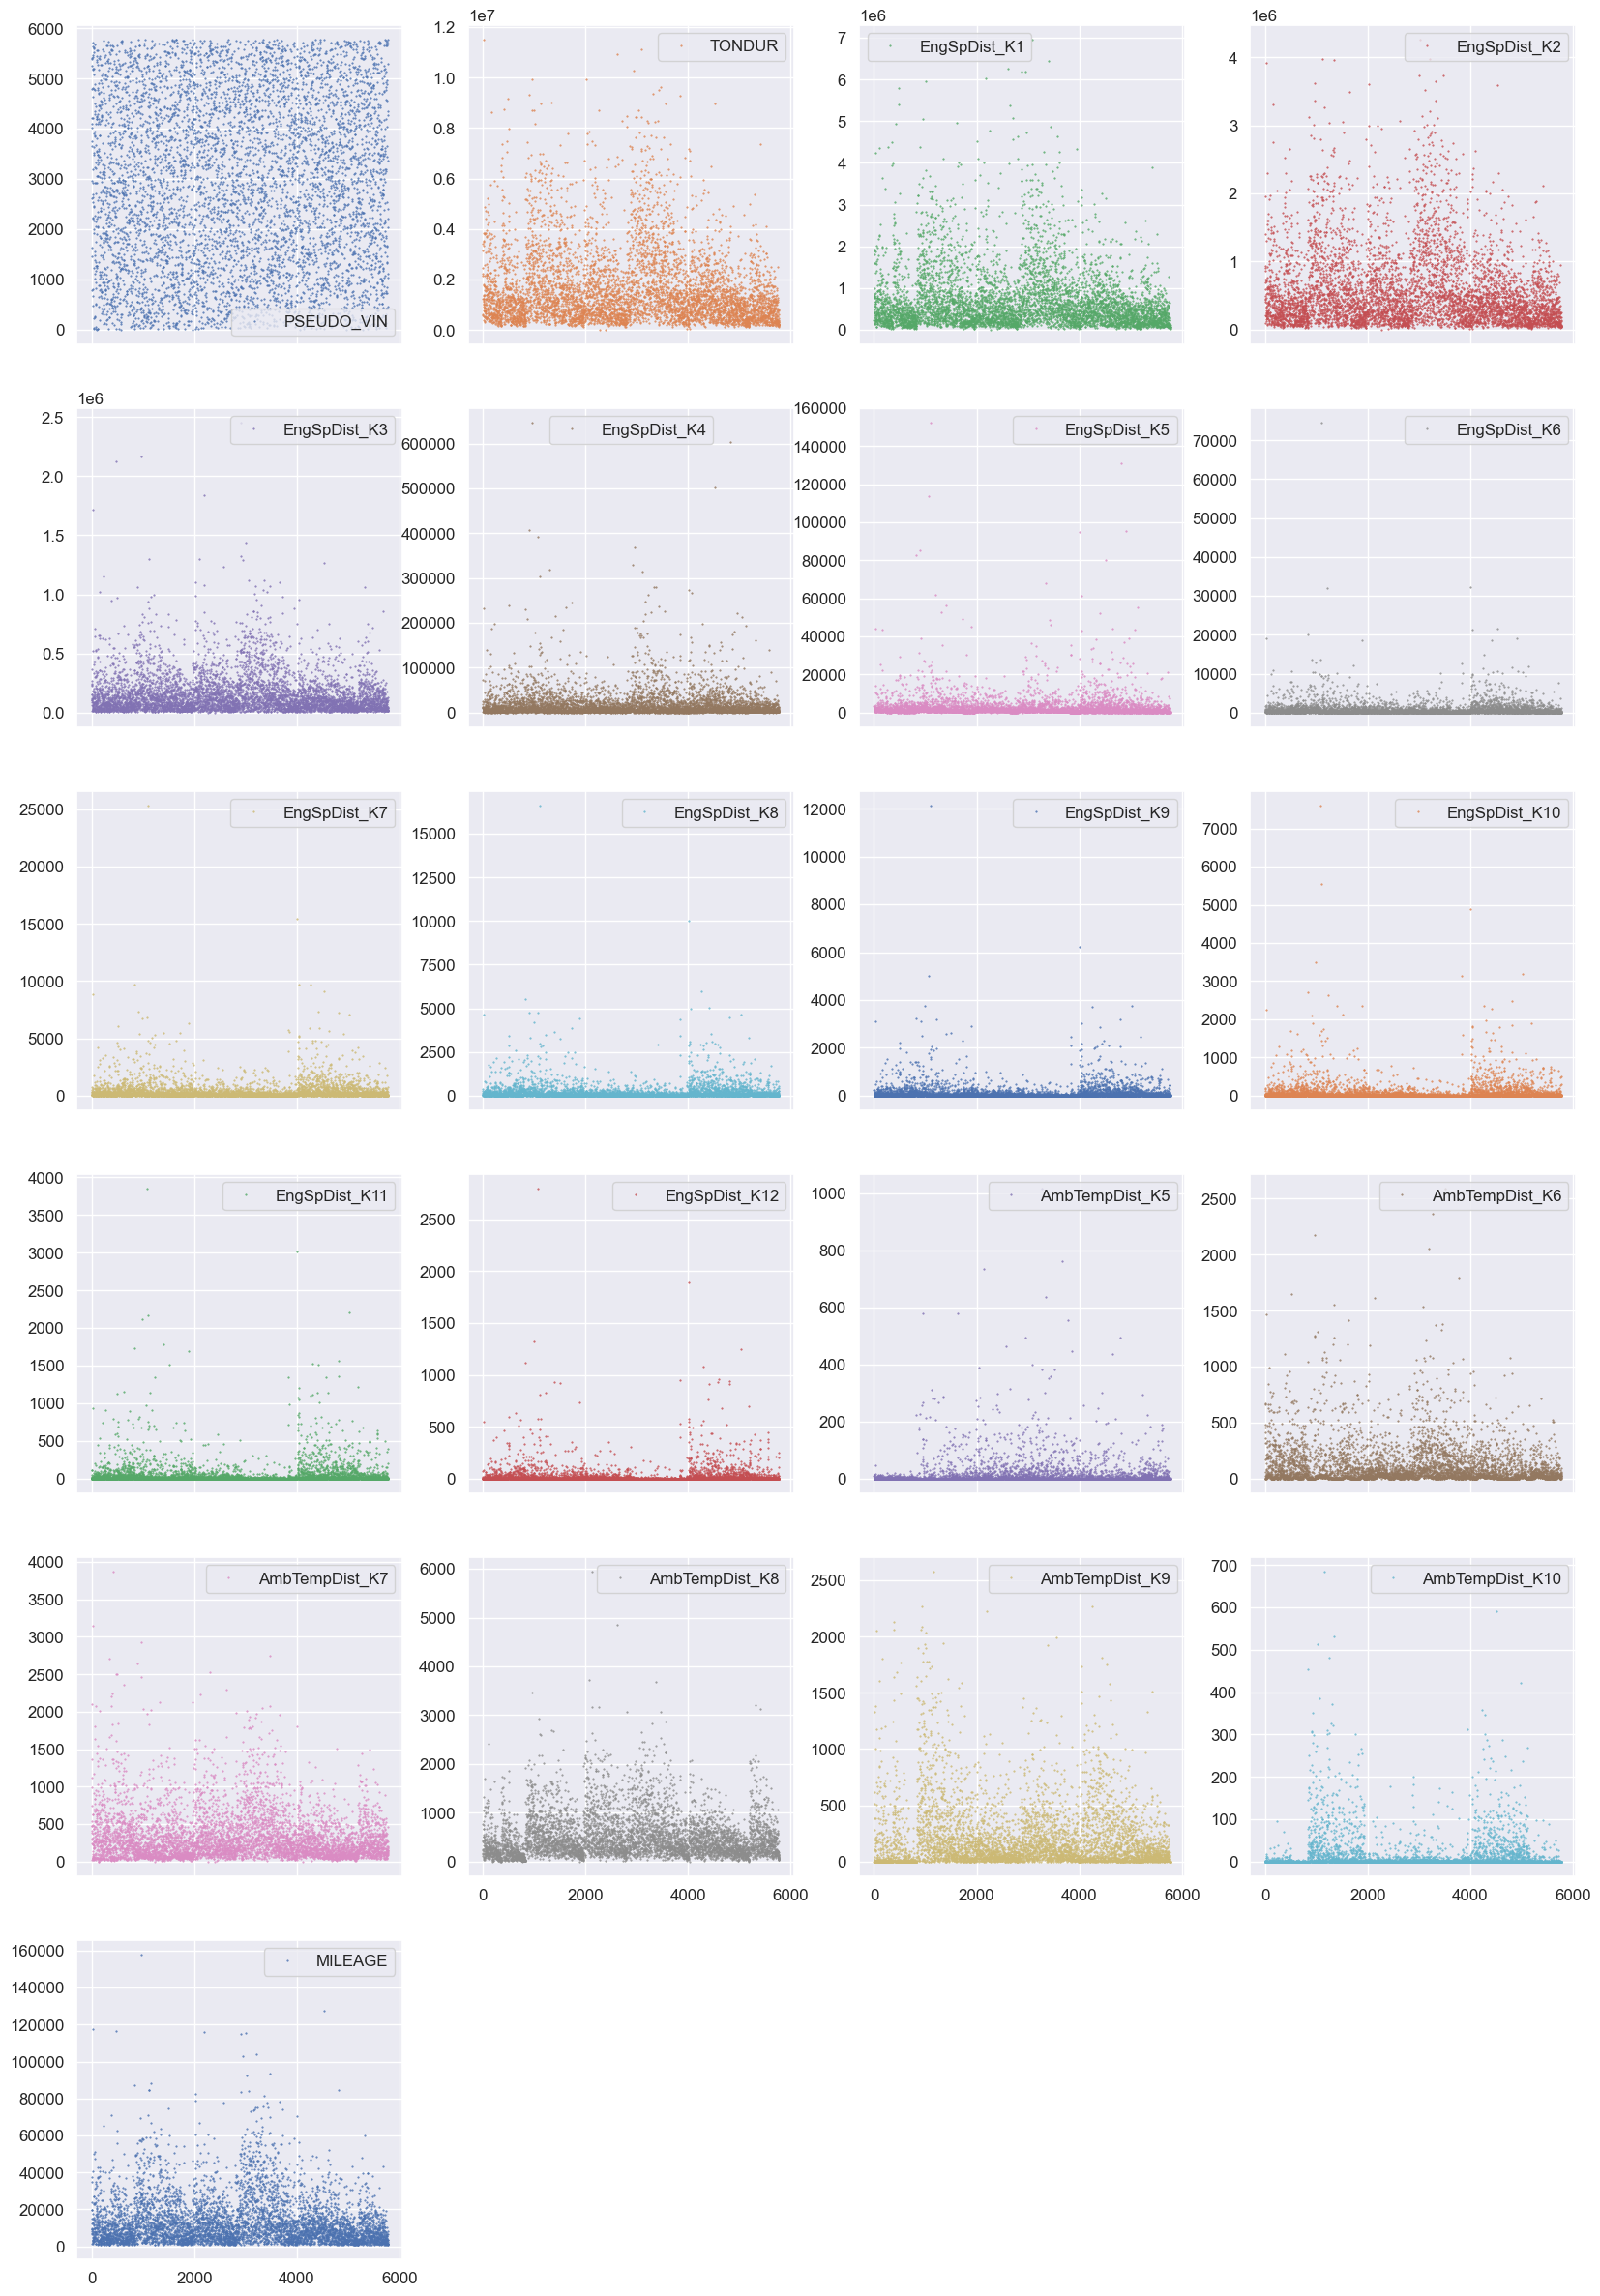

In [16]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(20, 30), markersize=1);

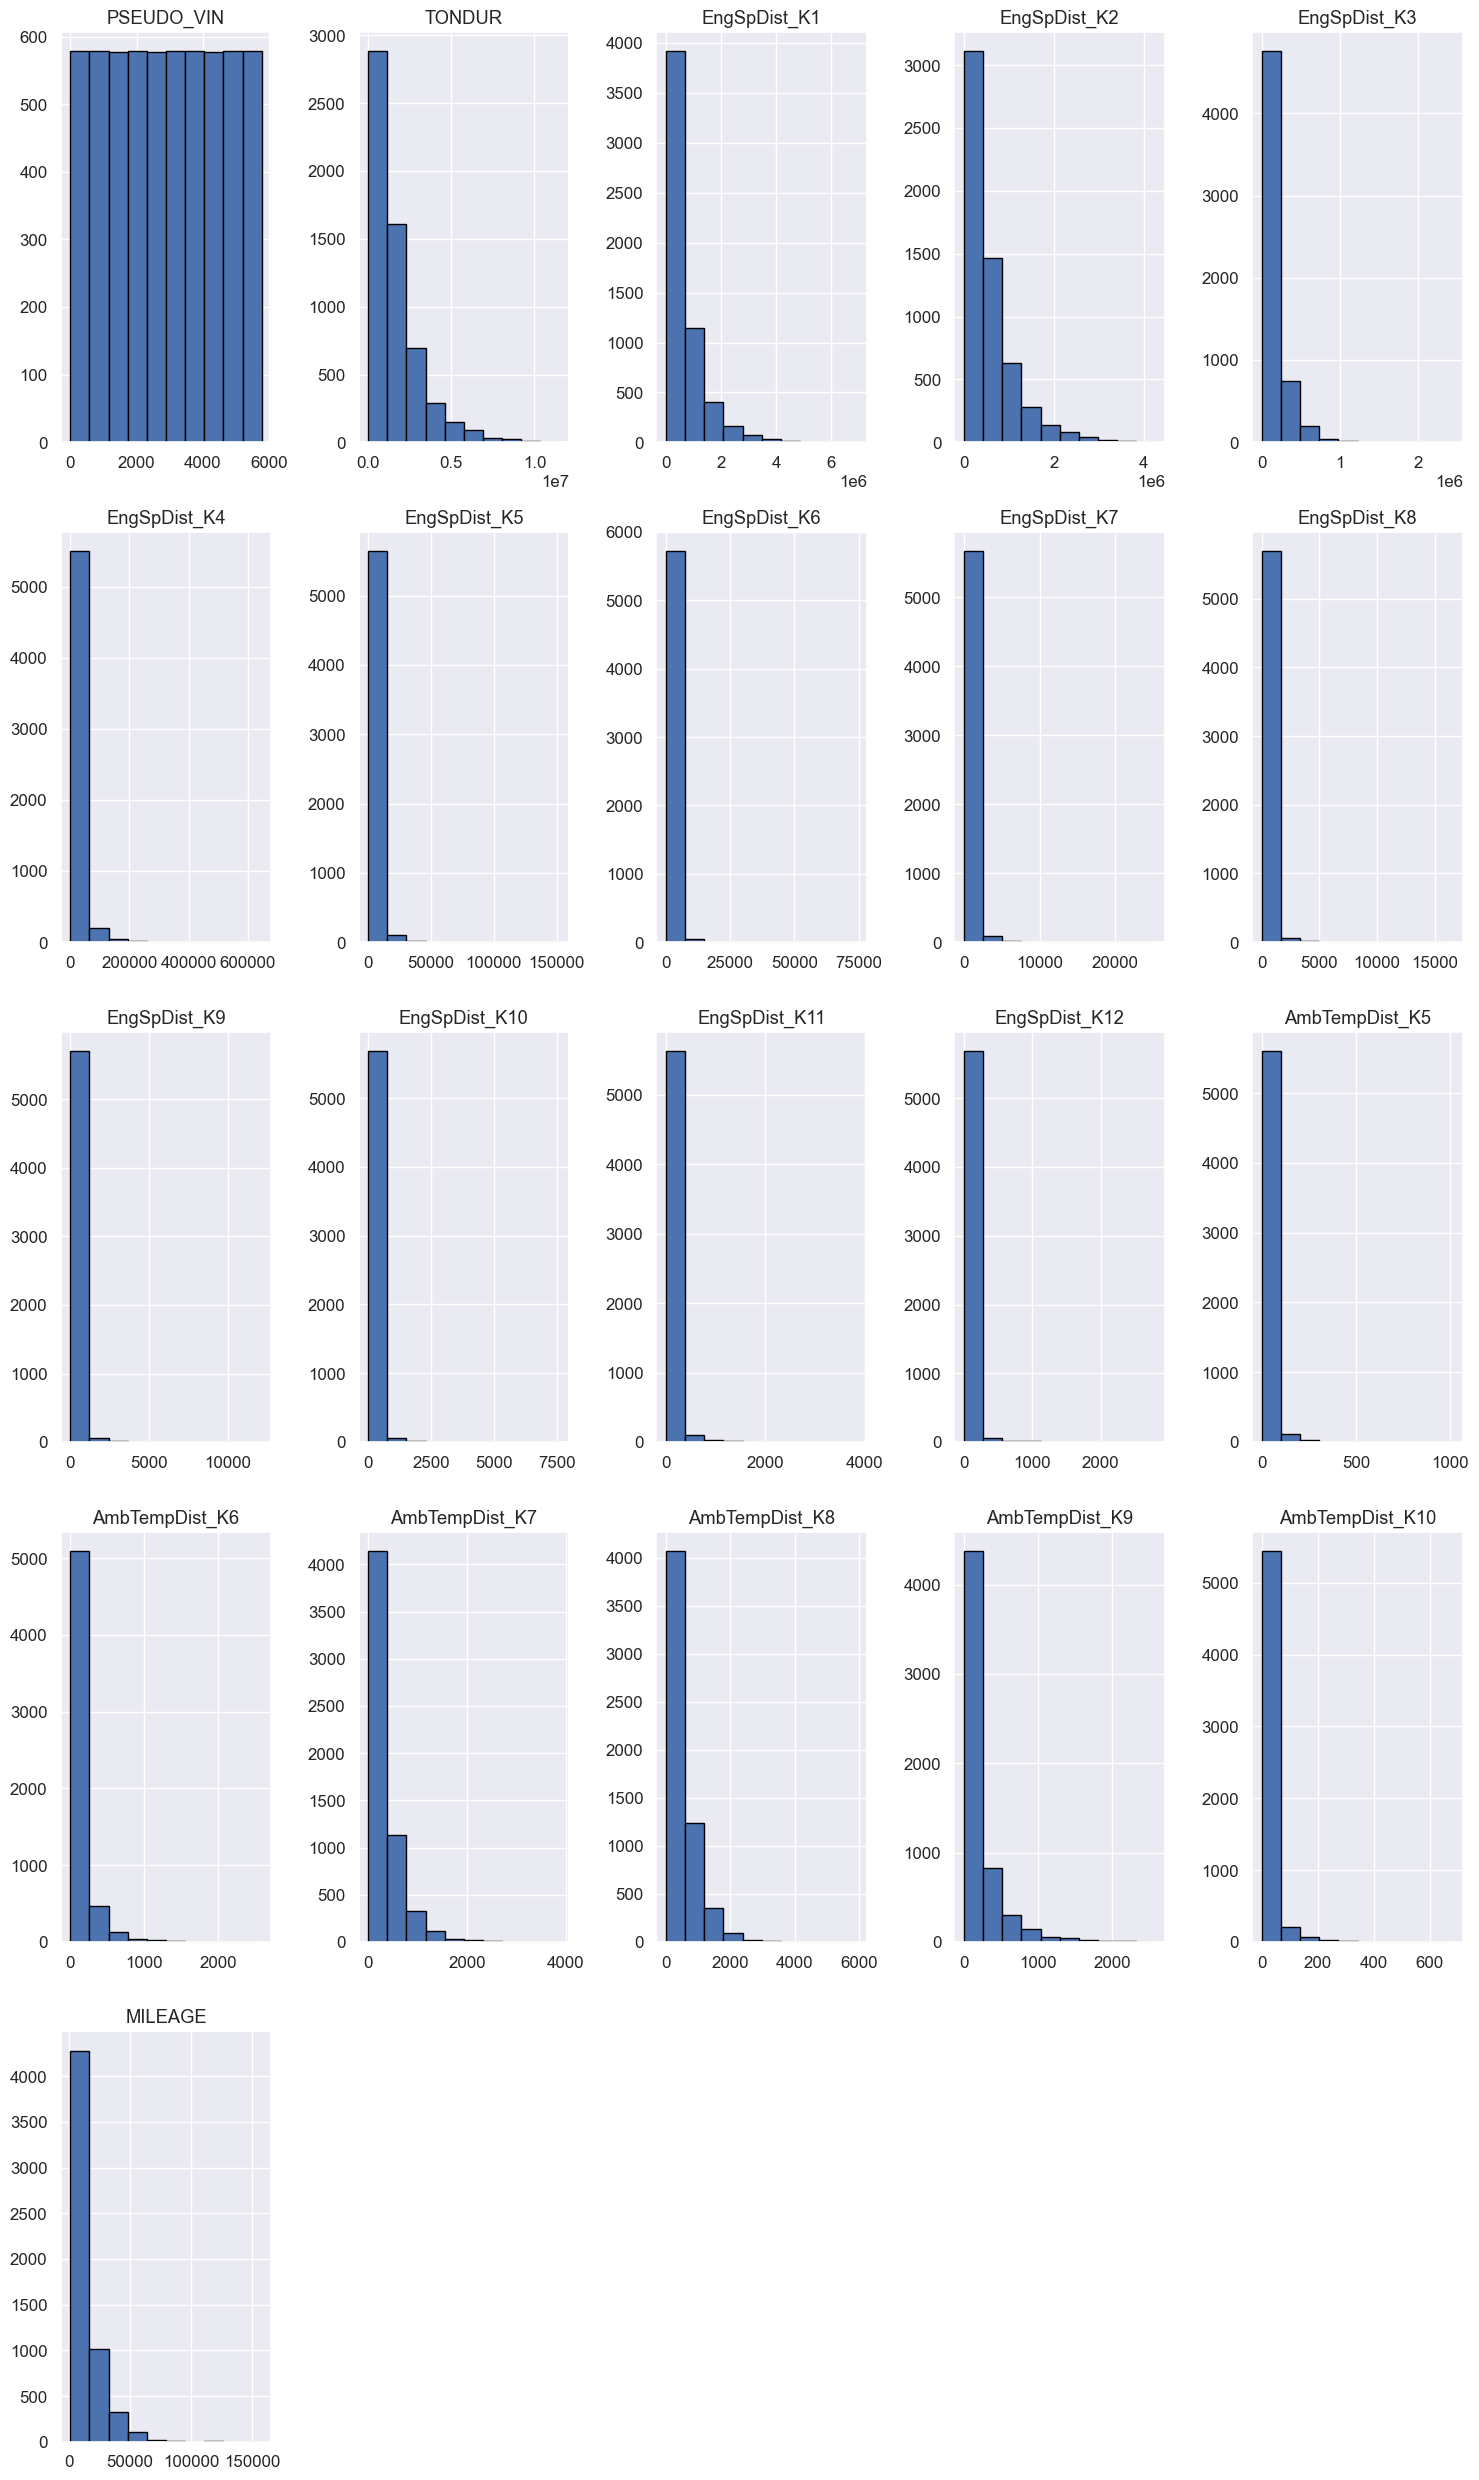

In [17]:
df.hist(bins=10, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

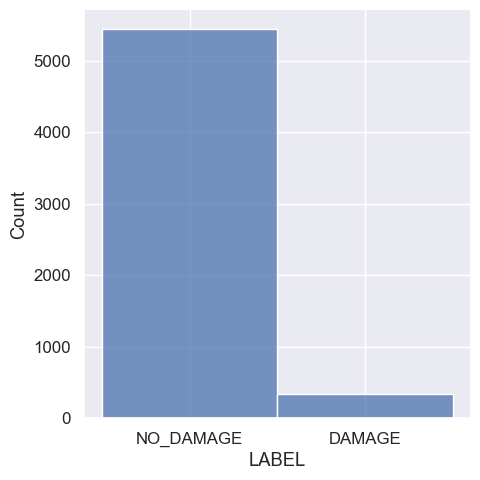

In [18]:
sns.displot(data=df, x="LABEL")

In [20]:
features = list(df.keys())
features.remove("LABEL")

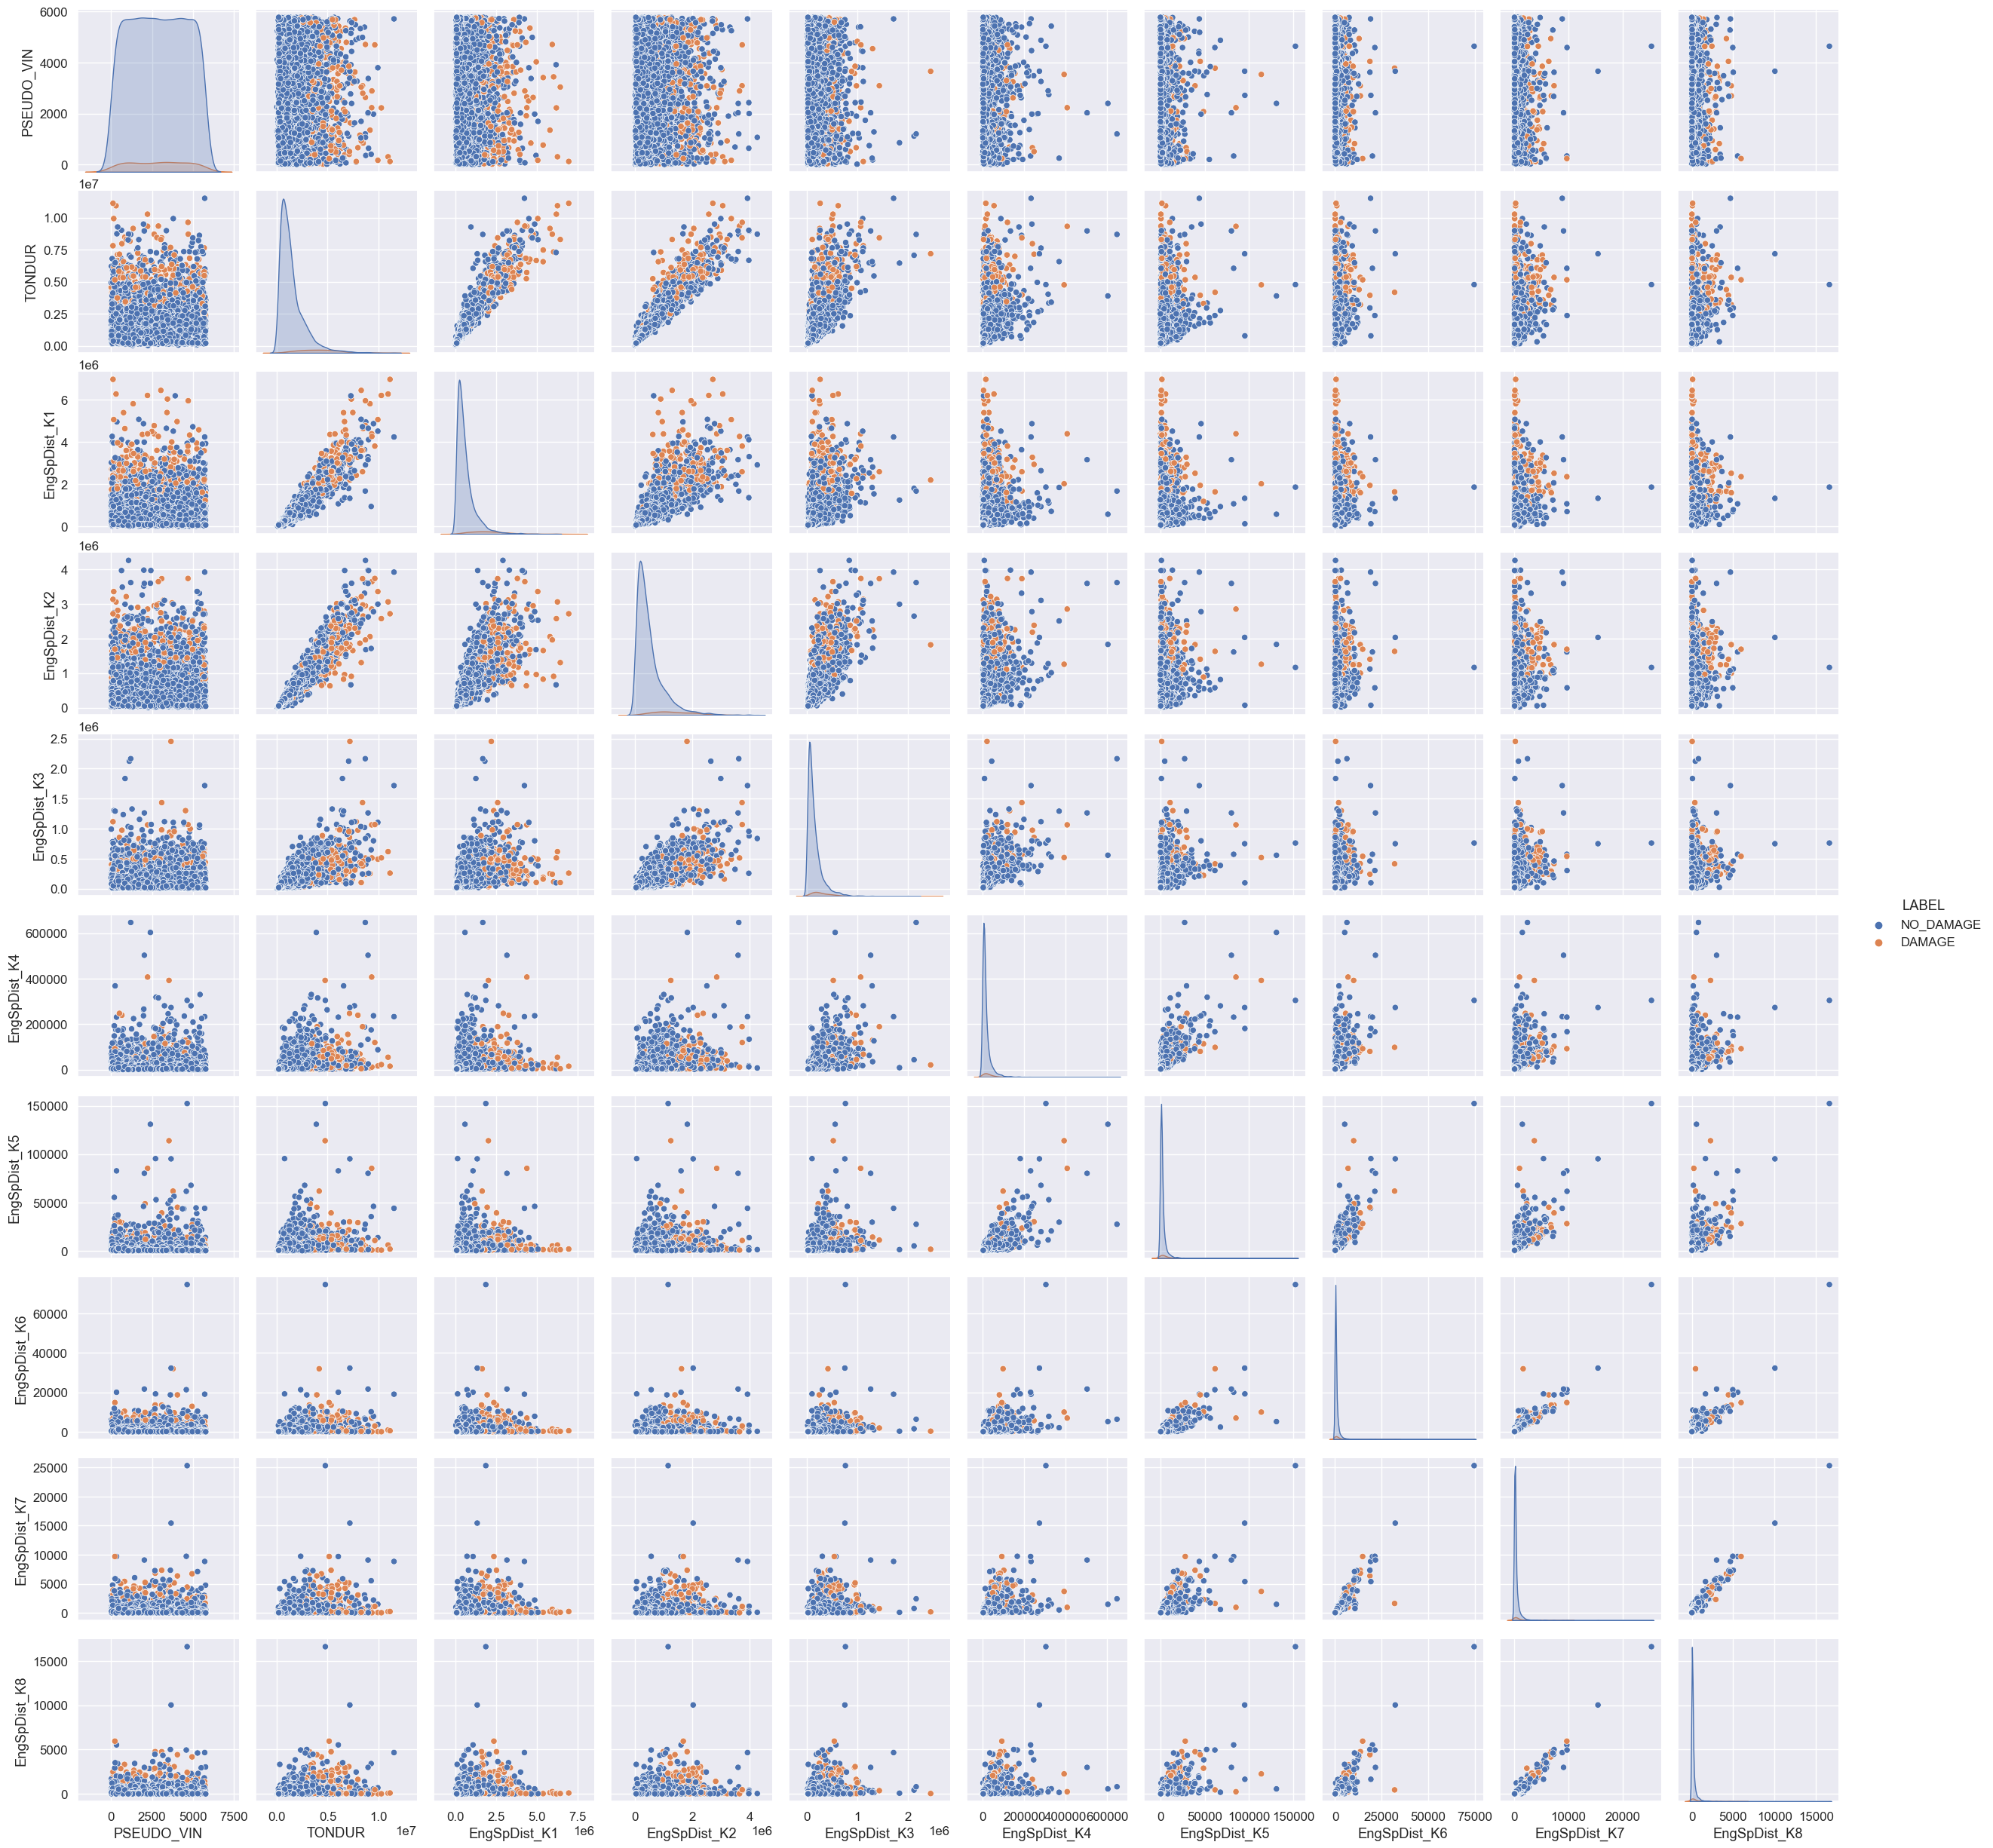

In [22]:
sns.pairplot(df[features[0:10]+['LABEL']], hue="LABEL", height=2.5)

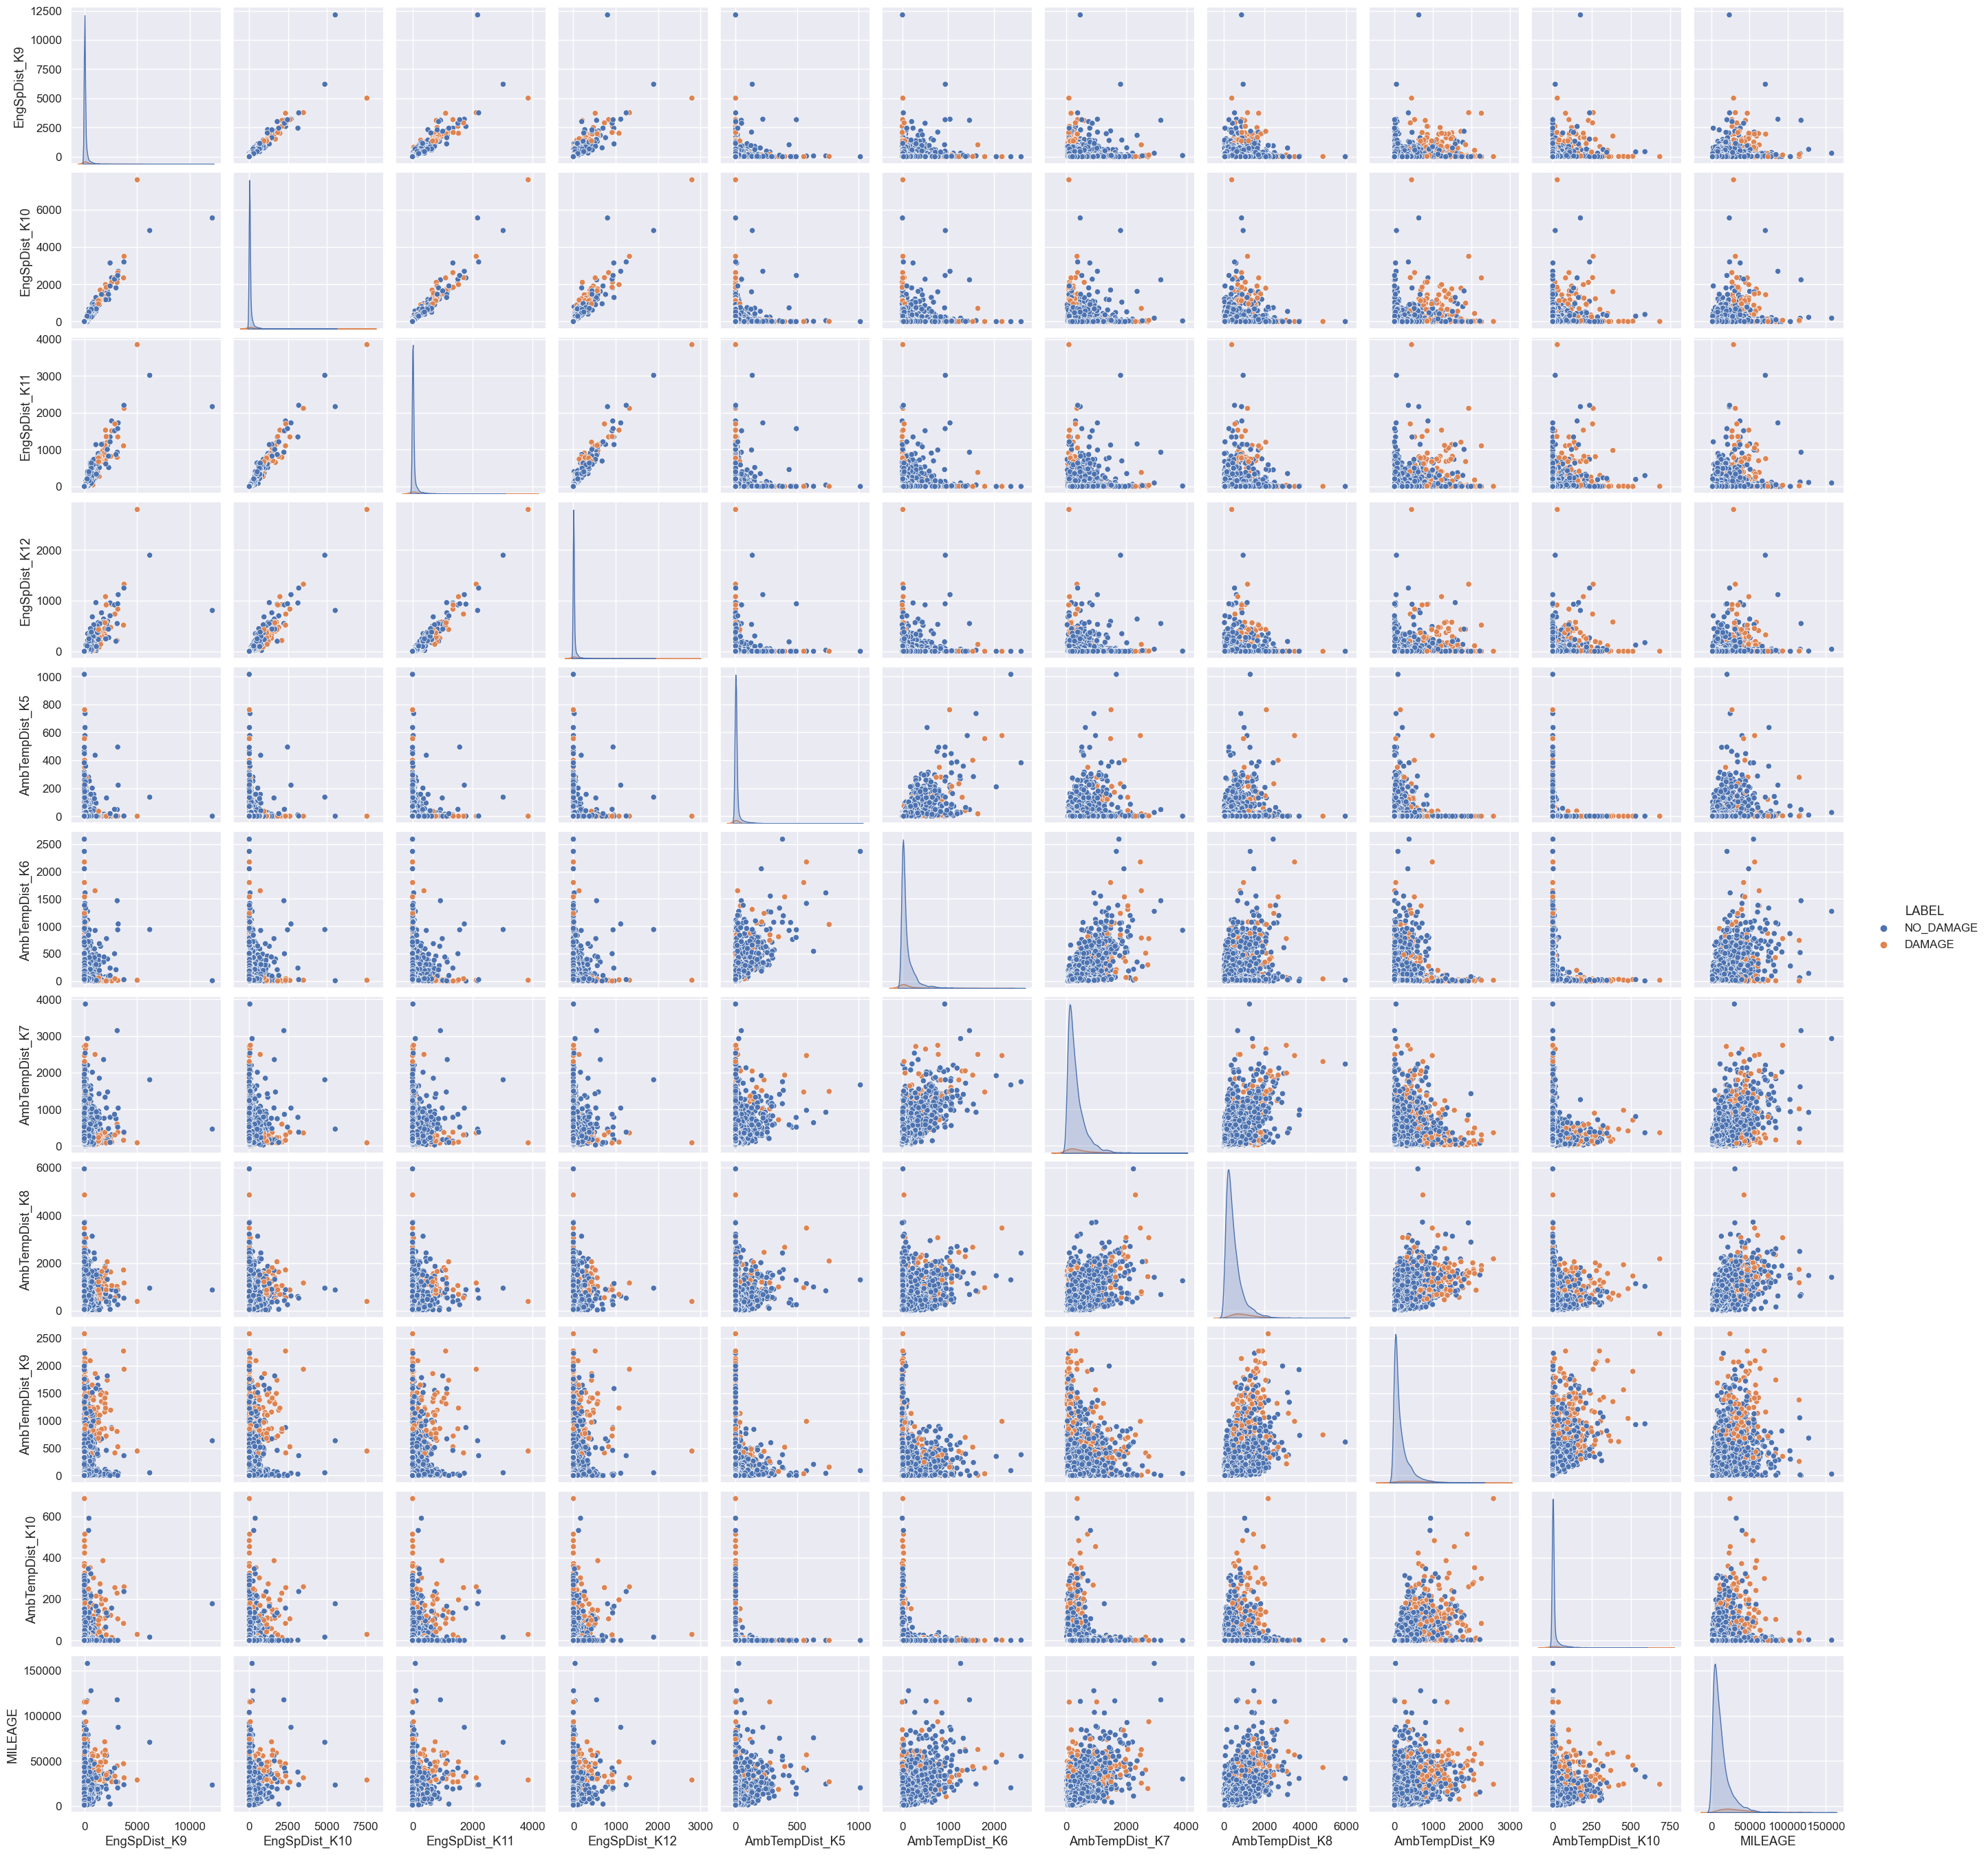

In [23]:
sns.pairplot(df[features[10:21]+['LABEL']], hue="LABEL", height=2.5)

In [24]:
df_corr = df.corr(method="pearson")

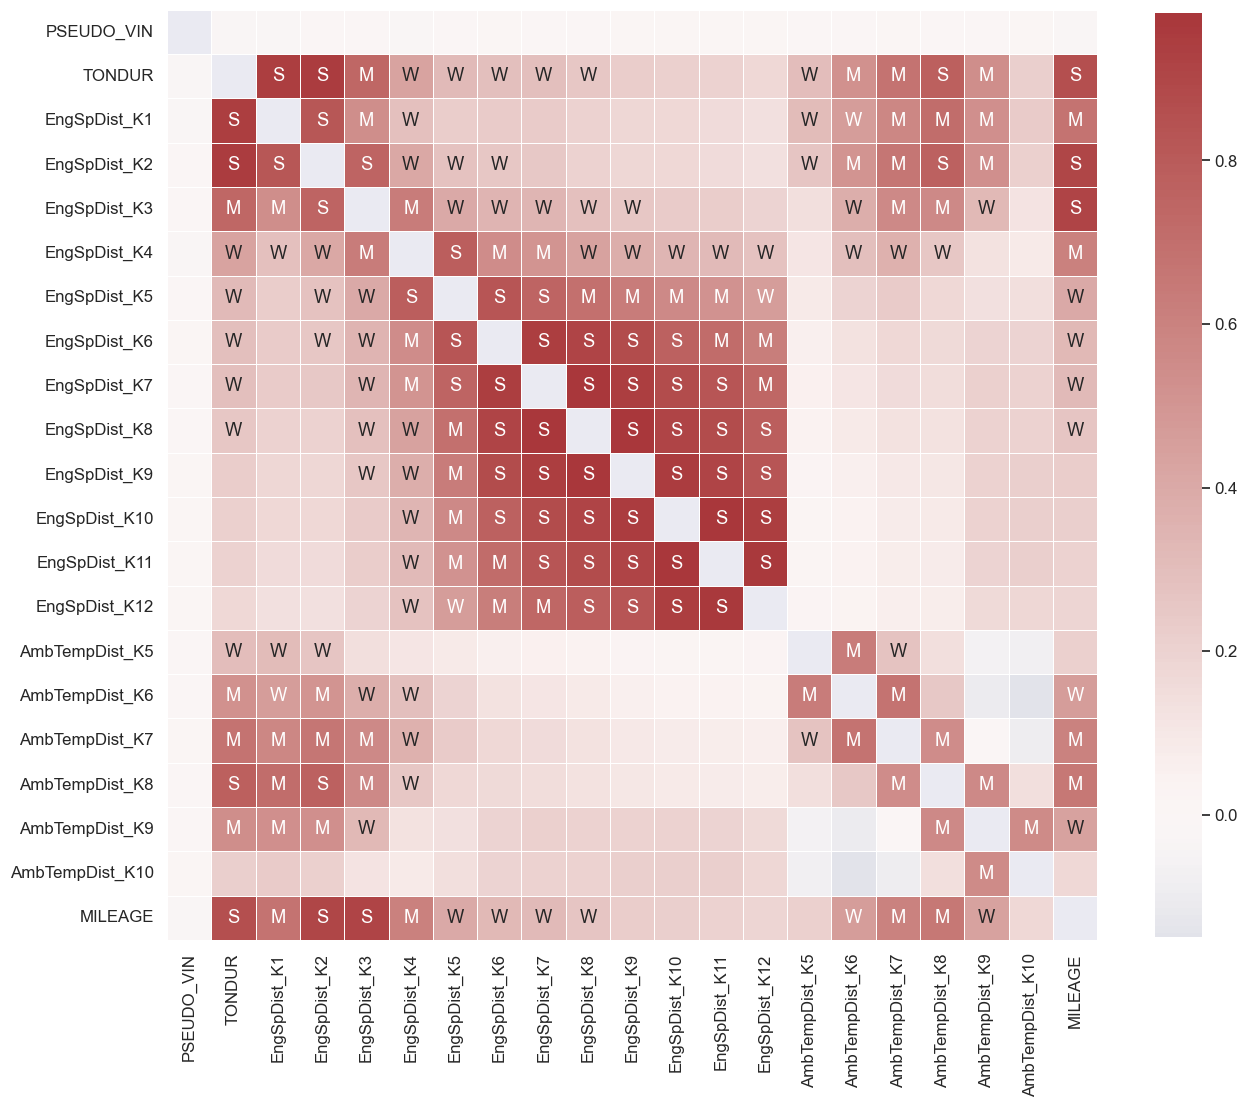

In [25]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [38]:
df_corr_abs = df.corr(method="pearson").abs()

In [39]:
upper_triangle = df_corr_abs.where(np.triu(np.ones(df_corr_abs.shape), k=1).astype(np.bool))

In [40]:
upper_triangle

PSEUDO_VIN   TONDUR  EngSpDist_K1  EngSpDist_K2  \
PSEUDO_VIN              NaN  0.01251      0.013752      0.006786   
TONDUR                  NaN      NaN      0.942753      0.949634   
EngSpDist_K1            NaN      NaN           NaN      0.824664   
EngSpDist_K2            NaN      NaN           NaN           NaN   
EngSpDist_K3            NaN      NaN           NaN           NaN   
EngSpDist_K4            NaN      NaN           NaN           NaN   
EngSpDist_K5            NaN      NaN           NaN           NaN   
EngSpDist_K6            NaN      NaN           NaN           NaN   
EngSpDist_K7            NaN      NaN           NaN           NaN   
EngSpDist_K8            NaN      NaN           NaN           NaN   
EngSpDist_K9            NaN      NaN           NaN           NaN   
EngSpDist_K10           NaN      NaN           NaN           NaN   
EngSpDist_K11           NaN      NaN           NaN           NaN   
EngSpDist_K12           NaN      NaN           NaN           NaN   
AmbTempDist_K5          NaN      NaN           NaN           NaN   
AmbTempDist_K6          NaN      NaN           NaN           NaN   
AmbTempDist_K7          NaN      NaN           NaN           NaN   
AmbTempDist_K8          NaN      NaN           NaN           NaN   
AmbTempDist_K9          NaN      NaN           NaN           NaN   
AmbTempDist_K10         NaN      NaN           NaN           NaN   
MILEAGE                 NaN      NaN           NaN           NaN   

                 EngSpDist_K3  EngSpDist_K4  EngSpDist_K5  EngSpDist_K6  \
PSEUDO_VIN           0.007990      0.013297      0.002168      0.001500   
TONDUR               0.736674      0.434739      0.321017      0.300841   
EngSpDist_K1         0.543093      0.291304      0.227268      0.232988   
EngSpDist_K2         0.755047      0.414091      0.279614      0.253269   
EngSpDist_K3              NaN      0.634493      0.401854      0.348203   
EngSpDist_K4              NaN           NaN      0.781832      0.549923   
EngSpDist_K5              NaN           NaN           NaN      0.832071   
EngSpDist_K6              NaN           NaN           NaN           NaN   
EngSpDist_K7              NaN           NaN           NaN           NaN   
EngSpDist_K8              NaN           NaN           NaN           NaN   
EngSpDist_K9              NaN           NaN           NaN           NaN   
EngSpDist_K10             NaN           NaN           NaN           NaN   
EngSpDist_K11             NaN           NaN           NaN           NaN   
EngSpDist_K12             NaN           NaN           NaN           NaN   
AmbTempDist_K5            NaN           NaN           NaN           NaN   
AmbTempDist_K6            NaN           NaN           NaN           NaN   
AmbTempDist_K7            NaN           NaN           NaN           NaN   
AmbTempDist_K8            NaN           NaN           NaN           NaN   
AmbTempDist_K9            NaN           NaN           NaN           NaN   
AmbTempDist_K10           NaN           NaN           NaN           NaN   
MILEAGE                   NaN           NaN           NaN           NaN   

                 EngSpDist_K7  EngSpDist_K8  ...  EngSpDist_K10  \
PSEUDO_VIN           0.005492      0.001316  ...       0.007334   
TONDUR               0.297508      0.260345  ...       0.215466   
EngSpDist_K1         0.233282      0.204049  ...       0.169858   
EngSpDist_K2         0.245048      0.208167  ...       0.168569   
EngSpDist_K3         0.339740      0.290677  ...       0.238776   
EngSpDist_K4         0.510910      0.440632  ...       0.343178   
EngSpDist_K5         0.753707      0.697859  ...       0.561951   
EngSpDist_K6         0.940674      0.911522  ...       0.770656   
EngSpDist_K7              NaN      0.980148  ...       0.872725   
EngSpDist_K8              NaN           NaN  ...       0.911386   
EngSpDist_K9              NaN           NaN  ...       0.950012   
EngSpDist_K10             NaN           NaN  ...            NaN  

In [41]:
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

In [42]:
to_drop

['EngSpDist_K8',
 'EngSpDist_K9',
 'EngSpDist_K10',
 'EngSpDist_K11',
 'EngSpDist_K12']

In [44]:
df = df.drop(columns=to_drop, axis=1)

In [46]:
df.head()

PSEUDO_VIN     TONDUR  EngSpDist_K1  EngSpDist_K2  EngSpDist_K3  \
0        5247  1249456.1      239471.8      443507.3      230166.7   
1        5405  2221482.5      868673.2      862615.7      154180.3   
2        1642  3433681.7      822744.4     1954545.1      366699.7   
3        4784   615134.7      138935.2      209138.3      106259.6   
4        3656  2141362.5      797644.6      729555.5      242742.9   

   EngSpDist_K4  EngSpDist_K5  EngSpDist_K6  EngSpDist_K7  AmbTempDist_K5  \
0       18955.4        3453.7        1631.0         748.4              10   
1       12707.2        2885.7         951.6         466.9              14   
2       26077.9        1452.6         238.2          91.5               6   
3       10133.9        1111.9         230.7          81.5               0   
4       13288.6        2374.5         815.7         341.1              12   

   AmbTempDist_K6  AmbTempDist_K7  AmbTempDist_K8  AmbTempDist_K9  \
0             317             416             155               0   
1             478             479             167               1   
2             676             993             261               2   
3             169             295             112               2   
4             358             750             229               2   

   AmbTempDist_K10  MILEAGE      LABEL  
0                0    35008  NO_DAMAGE  
1                0    14959  NO_DAMAGE  
2                0    37685  NO_DAMAGE  
3                0     7054  NO_DAMAGE  
4                1    19680  NO_DAMAGE

In [47]:
df = df.drop(columns=["PSEUDO_VIN"], axis=1)

In [50]:
df.describe()

TONDUR  EngSpDist_K1  EngSpDist_K2  EngSpDist_K3   EngSpDist_K4  \
count  5.777000e+03  5.777000e+03  5.777000e+03  5.777000e+03    5777.000000   
mean   1.638604e+06  6.949810e+05  5.659570e+05  1.523329e+05   17916.948520   
std    1.478634e+06  7.280069e+05  5.510523e+05  1.698033e+05   31982.030334   
min    1.692310e+04  4.641300e+03  4.066000e+02  3.030000e+01      10.400000   
25%    6.443811e+05  2.352837e+05  1.947698e+05  4.601980e+04    3302.400000   
50%    1.167932e+06  4.634370e+05  3.886051e+05  9.958480e+04    8232.300000   
75%    2.111713e+06  8.623770e+05  7.292884e+05  1.953351e+05   19650.900000   
max    1.151146e+07  6.959281e+06  4.262310e+06  2.453757e+06  646982.900000   

        EngSpDist_K5  EngSpDist_K6  EngSpDist_K7  AmbTempDist_K5  \
count    5777.000000   5777.000000   5777.000000     5777.000000   
mean     2744.953176    769.363095    343.032404       11.718885   
std      6069.909116   1871.395346    803.763476       43.497786   
min         3.400000      0.900000      0.200000        0.000000   
25%       609.400000     88.600000     33.900000        0.000000   
50%      1166.800000    261.900000    103.900000        0.000000   
75%      2629.400000    753.300000    319.200000        4.000000   
max    152502.200000  74583.600000  25328.500000     1016.000000   

       AmbTempDist_K6  AmbTempDist_K7  AmbTempDist_K8  AmbTempDist_K9  \
count     5777.000000     5777.000000     5777.000000     5777.000000   
mean       107.391726      331.057989      507.202527      194.065605   
std        182.867761      330.765296      447.363231      282.863019   
min          0.000000        0.000000        0.000000        0.000000   
25%         10.000000      113.000000      206.000000       19.000000   
50%         36.000000      226.000000      376.000000       87.000000   
75%        128.000000      433.000000      652.000000      250.000000   
max       2592.000000     3874.000000     5947.000000     2579.000000   

       AmbTempDist_K10        MILEAGE  
count      5777.000000    5777.000000  
mean         12.809070   13322.323524  
std          40.439852   13254.917856  
min           0.000000    1002.000000  
25%           0.000000    4485.000000  
50%           0.000000    9330.000000  
75%           4.000000   17187.000000  
max         685.000000  157940.000000

In [52]:
df.shape

(5777, 16)

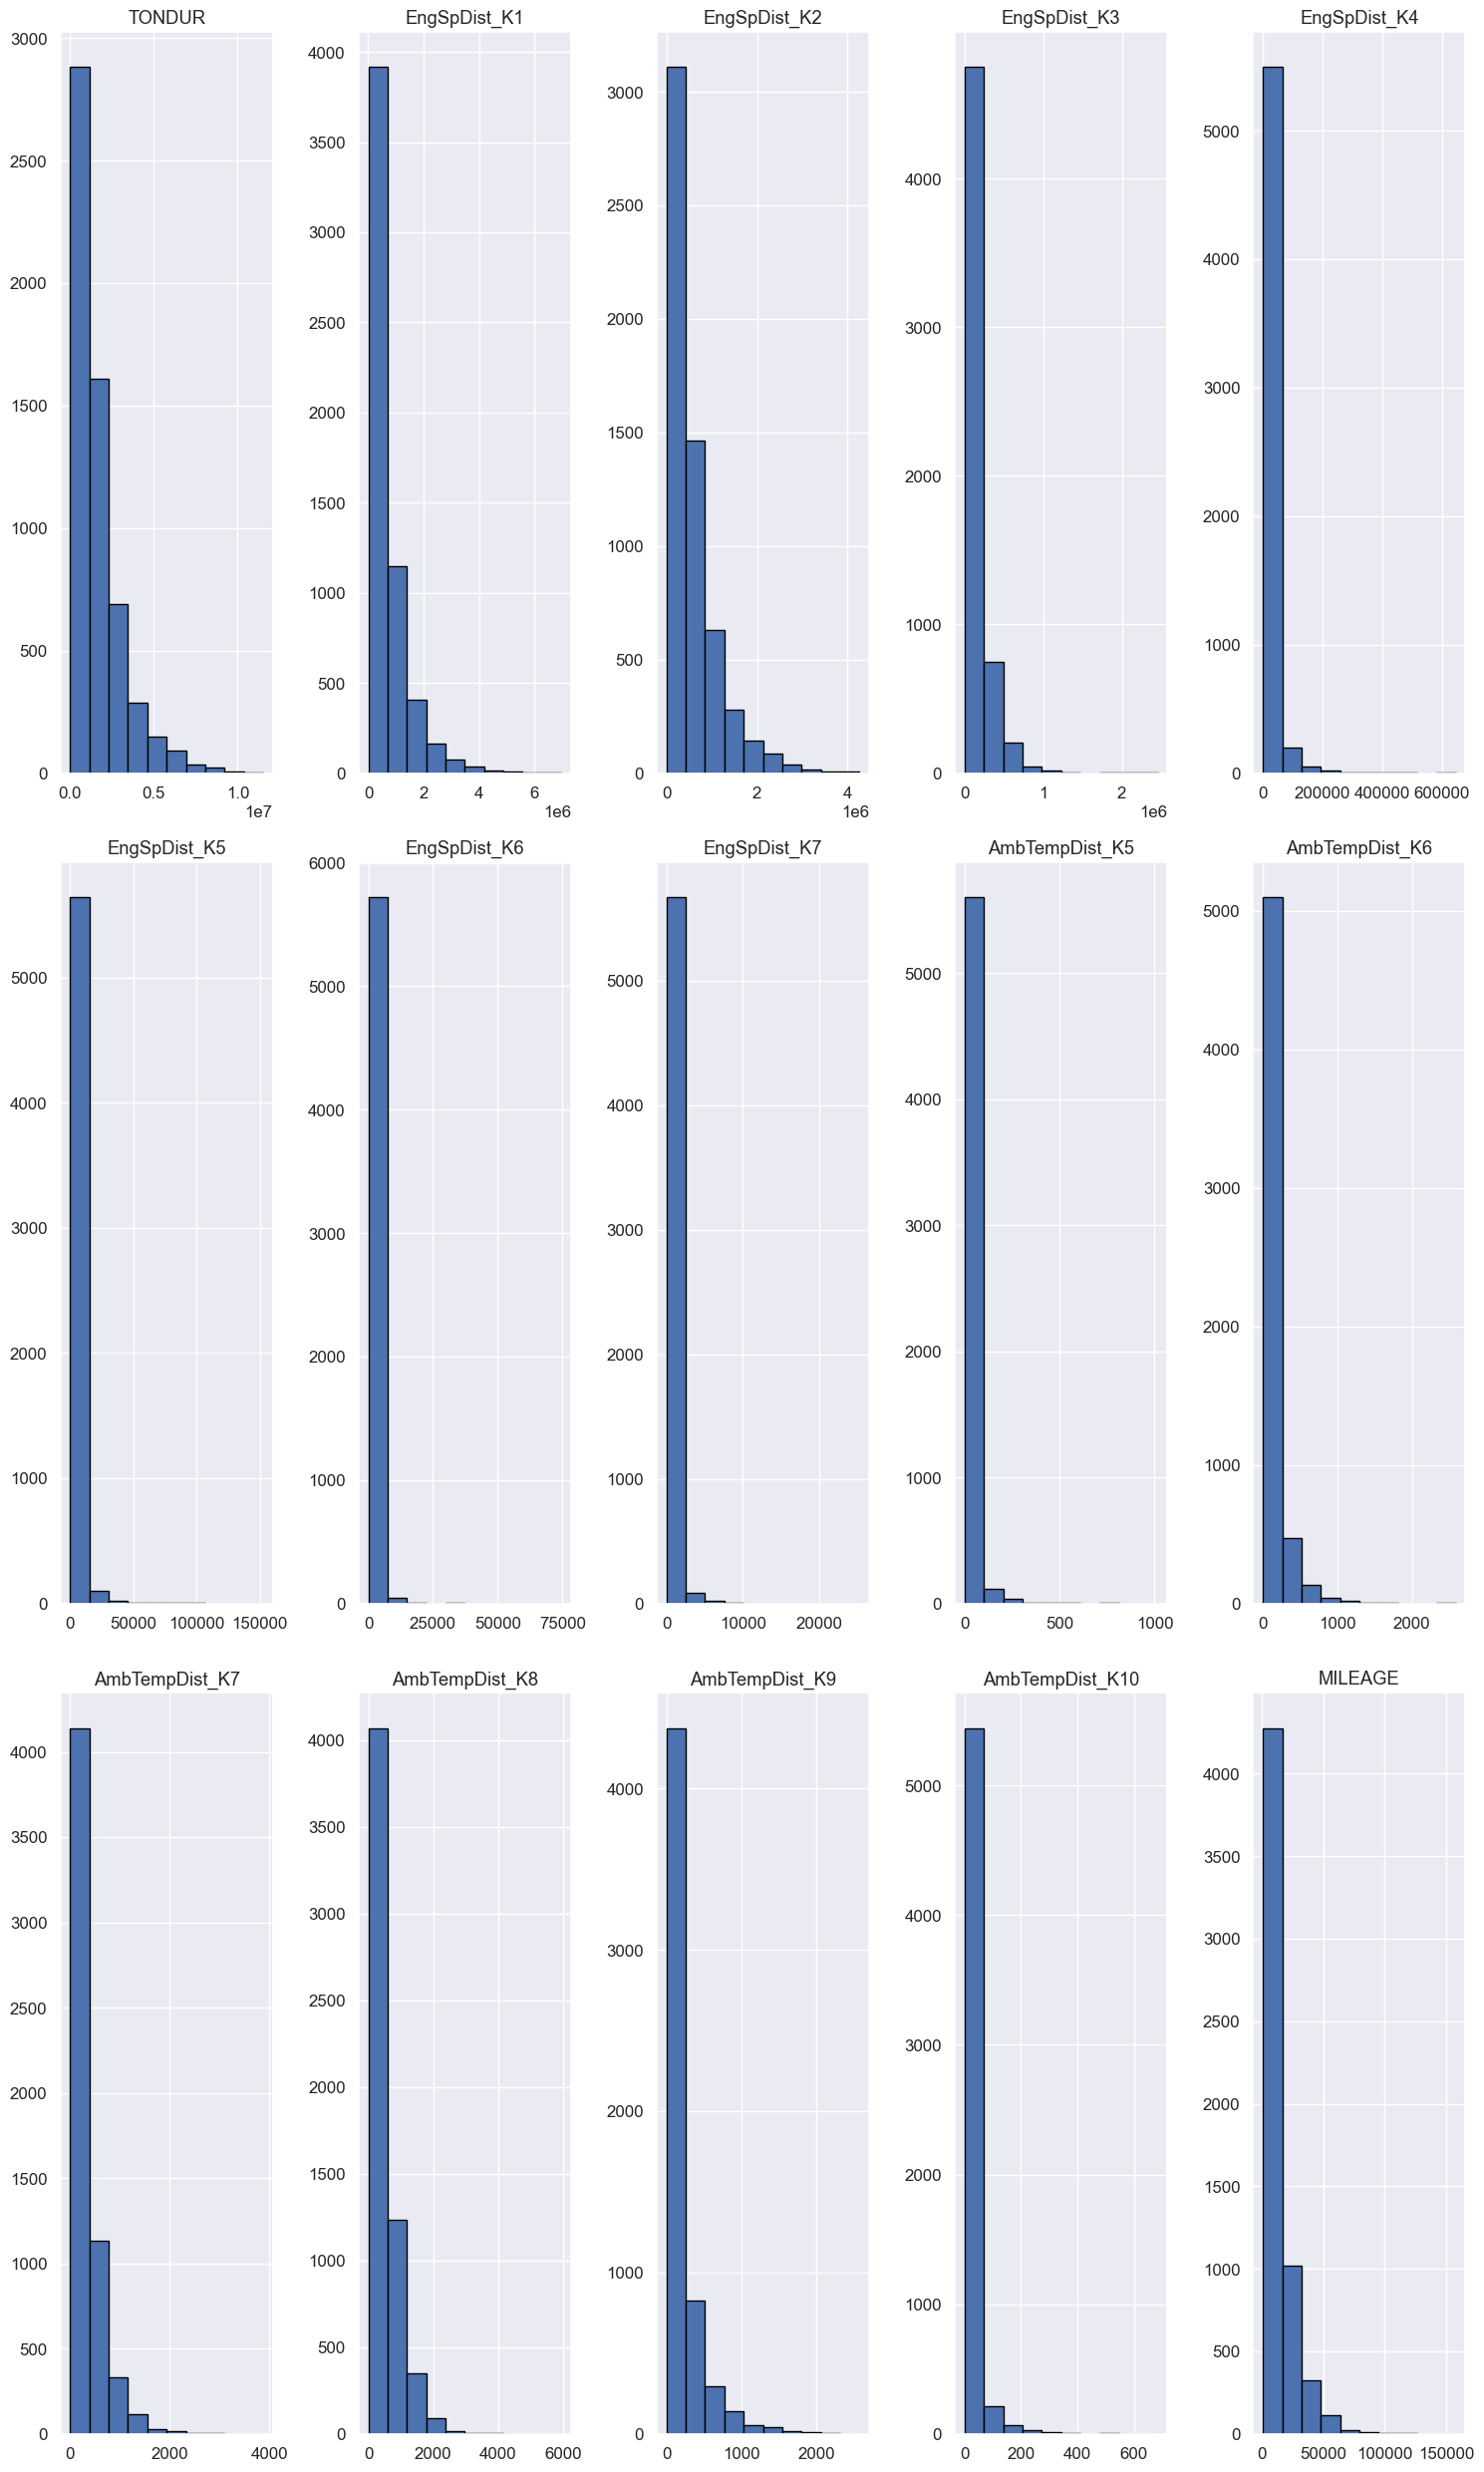

In [51]:
df.hist(bins=10, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [54]:
df.skew().sort_values(ascending=False)

EngSpDist_K6       15.091755
EngSpDist_K5       10.239829
EngSpDist_K7       10.158493
AmbTempDist_K5      8.890287
EngSpDist_K4        6.772806
AmbTempDist_K10     6.094272
AmbTempDist_K6      4.104086
EngSpDist_K3        3.352739
AmbTempDist_K9      2.867396
EngSpDist_K1        2.677670
AmbTempDist_K7      2.596827
MILEAGE             2.536436
AmbTempDist_K8      2.309297
EngSpDist_K2        2.091452
TONDUR              2.062756
dtype: float64

In [60]:
features = list(df.keys())
